In [185]:
import pandas
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [186]:
teste = pandas.read_csv("nba_teste.csv")
treino = pandas.read_csv("nba_treino.csv")
# Assuming you have your training data and labels stored in `treino` dataframe
X_train = treino.iterrows()
y_train = treino['TARGET_5Yrs'].values

# Assuming you have your test data and labels stored in `teste` dataframe
X_test = teste.iterrows()
y_test = teste['TARGET_5Yrs'].values

Implementação algoritmo K-Nearest Neighbors

In [187]:
def k_nearest_neighbors(train, y_train, test_point, k):
    distances = np.sqrt(np.sum((train[:, :-1] - test_point[:-1])**2, axis=1))
    sorted_indices = distances.argsort()[:k]
    count_1 = 0
    count_0 = 0

    for indice in sorted_indices:
        if train[indice, -1] == 1:
            count_1 += 1
        elif train[indice, -1] == 0:
            count_0 += 1

    if count_1 > count_0:
        query_label = 1
    else:
        query_label = 0
    
    return query_label


Cálculo das métricas (Acurácia, Precisão, Revocação (Recall) e F1)

In [188]:
def calculate_classification_metrics(confusion_matrix):

    true_negative, false_positive, false_negative, true_positive = confusion_matrix
    accuracy = (true_positive + true_negative) / (true_negative + false_positive + false_negative + true_positive)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1


Cálculo da Matriz de Confusão

In [189]:
def calculate_confusion_matrix(y_true, y_pred):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for i in range(len(y_pred)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positive += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            true_negative += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_positive += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negative += 1
    
    confusion_matrix = true_negative, false_positive, false_negative, true_positive
    return confusion_matrix


Aprendizado Supervisionado - KNN

In [200]:
k_values = [2, 10, 50, 150]

for k in k_values:
    y_pred_k = np.zeros(teste.shape[0])
    j = 0
    for id, row in teste.iterrows():
        point = row.values
        y_pred_k[j] = k_nearest_neighbors(treino.values, y_train, point, k)
        j+=1
    confusion_matrices = calculate_confusion_matrix(y_test, y_pred_k)
    accuracy, precision, recall, f1 = calculate_classification_metrics(confusion_matrices)

    print("K:", k)
    print("Confusion Matrix:", confusion_matrices)
    print("Accuracies:", accuracy)
    print("Precisions:", precision)
    print("Recalls:", recall)
    print("F1 Scores:", f1)
    print()


K: 2
Confusion Matrix: (73, 27, 94, 74)
Accuracies: 0.5485074626865671
Precisions: 0.7326732673267327
Recalls: 0.44047619047619047
F1 Scores: 0.550185873605948

K: 10
Confusion Matrix: (58, 42, 57, 111)
Accuracies: 0.6305970149253731
Precisions: 0.7254901960784313
Recalls: 0.6607142857142857
F1 Scores: 0.6915887850467289

K: 50
Confusion Matrix: (54, 46, 42, 126)
Accuracies: 0.6716417910447762
Precisions: 0.7325581395348837
Recalls: 0.75
F1 Scores: 0.7411764705882353

K: 150
Confusion Matrix: (56, 44, 40, 128)
Accuracies: 0.6865671641791045
Precisions: 0.7441860465116279
Recalls: 0.7619047619047619
F1 Scores: 0.7529411764705882



Extra - KNN com scikit-learn

In [191]:
teste = pandas.read_csv("nba_teste.csv")
treino = pandas.read_csv("nba_treino.csv")


train_X = treino.drop(['TARGET_5Yrs'], axis=1)
test_X = teste.drop(['TARGET_5Yrs'], axis=1)

train_y = treino['TARGET_5Yrs']
test_y = teste['TARGET_5Yrs']

X_train = np.array([row for _, row in train_X.iterrows()])
X_test = np.array([row for _, row in test_X.iterrows()])

def knn(X_train, y_train, X_test, k):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    return y_pred

for k in [2, 10, 50, 150]:
    y_pred = knn(X_train, y_train, X_test, k)
    confusion_matrices = calculate_confusion_matrix(y_test, y_pred)
    accuracy, precision, recall, f1 = calculate_classification_metrics(confusion_matrices)
    print("K:", k)
    print("Accuracies:", accuracy)
    print("Precisions:", precision)
    print("Recalls:", recall)
    print("F1 Scores:", f1)
    print()

K: 2
Accuracies: 0.5522388059701493
Precisions: 0.7352941176470589
Recalls: 0.44642857142857145
F1 Scores: 0.5555555555555557

K: 10
Accuracies: 0.6305970149253731
Precisions: 0.7254901960784313
Recalls: 0.6607142857142857
F1 Scores: 0.6915887850467289

K: 50
Accuracies: 0.6716417910447762
Precisions: 0.7325581395348837
Recalls: 0.75
F1 Scores: 0.7411764705882353

K: 150
Accuracies: 0.6865671641791045
Precisions: 0.7441860465116279
Recalls: 0.7619047619047619
F1 Scores: 0.7529411764705882



Aprendizado Não-Supervisionado - K-Means

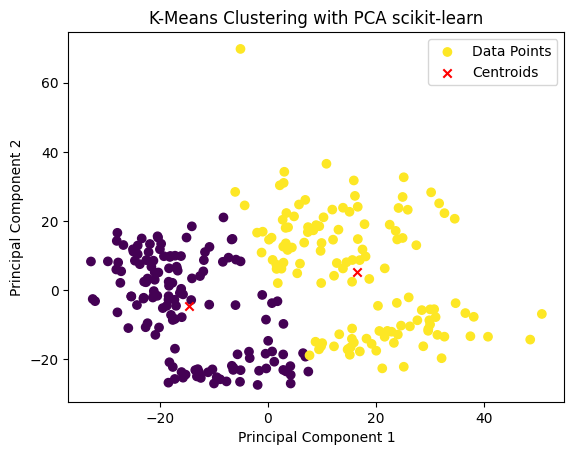

Centroids k = 2: [[75.22535211 21.57253521  8.58591549  3.32887324  7.36338028 45.31760563
   0.26690141  0.85915493 18.81338028  1.66126761  2.31338028 71.46549296
   1.23028169  2.38661972  3.61549296  2.11338028  0.78239437  0.44577465
   1.50985915]
 [45.06349206 12.10238095  4.01825397  1.5484127   3.61031746 42.90079365
   0.16031746  0.52936508 18.09920635  0.75793651  1.11587302 67.55396825
   0.68968254  1.32063492  2.00714286  1.01269841  0.42777778  0.25793651
   0.8031746 ]]
Cluster 0: [[82.  37.2 19.2 ...  0.6  1.9  1. ]
 [76.  30.3 10.6 ...  0.2  2.   1. ]
 [78.  22.  10.1 ...  0.3  1.2  0. ]
 ...
 [82.  27.9  9.8 ...  0.9  1.7  1. ]
 [82.  18.9  6.6 ...  0.2  1.2  1. ]
 [80.  15.8  4.3 ...  0.2  0.8  0. ]]
Cluster 1: [[40.   6.7  3.6 ...  0.1  0.6  1. ]
 [27.   6.6  1.3 ...  0.6  0.3  1. ]
 [44.   6.4  2.4 ...  0.4  0.6  1. ]
 ...
 [53.   7.2  3.  ...  0.1  0.6  0. ]
 [56.  19.1  5.6 ...  1.8  1.9  1. ]
 [50.  16.3  5.4 ...  0.1  0.9  1. ]]


In [219]:
def k_means(X, k, max_iterations=100):
    # Initialize centroids randomly
    #centroids = X[:,:-1][np.random.randint(X[:,:-1].shape[0], size=k)]
    centroids = X[:,:-1][np.random.choice(X[:,:-1].shape[0], k, replace=False)]
    labels = None

    for _ in range(max_iterations):
        # Assign samples to the nearest centroid
        distances = np.sqrt(np.sum((X[:, :-1][:, np.newaxis] - centroids)**2, axis=2))
        #distances = np.linalg.norm(X[:, np.newaxis, :-1] - centroids, axis=-1)
        current_labels = np.argmin(distances, axis=-1)

        # Update centroids
        new_centroids = np.empty((k, X.shape[1]-1))

        for i in range(k):
            new_centroids[i] = X[current_labels == i, :-1].mean(axis=0)

        # Check for convergence
        if labels is not None and np.all(labels == current_labels):
            break

        centroids = new_centroids
        labels = current_labels
    
    clusters = [X[current_labels == i] for i in range(k)]
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    pca = PCA(n_components=2)
    test_data_pca = pca.fit_transform(X[:,:-1])
    centroids_pca = pca.transform(centroids)

    plt.scatter(test_data_pca[:, 0], test_data_pca[:, 1], c=labels, label='Data Points')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', label='Centroids')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-Means Clustering with PCA scikit-learn')
    plt.legend()
    plt.show()
    

    return centroids, clusters

centroids, clusters = k_means(teste.values, 2)

# k_values = [2, 3]

# # Assuming you have your data stored in `treino` dataframe

# for k in k_values:
#     centroids, clusters = k_means(teste.values, k)

print("Centroids k = 2:", centroids)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")


k = 3

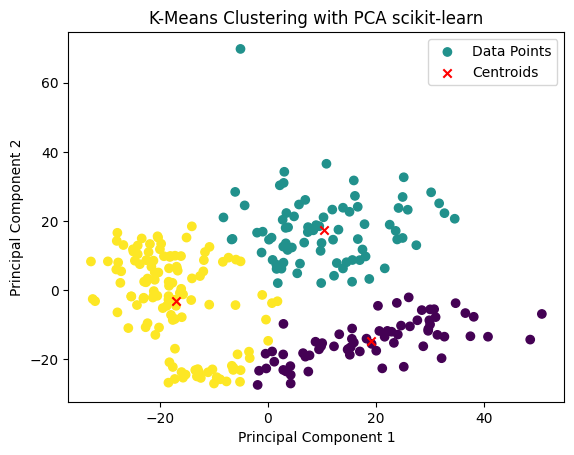

Centroids k = 3: [[5.01194030e+01 1.20582090e+01 4.00298507e+00 1.58955224e+00
  3.32238806e+00 4.69343284e+01 0.00000000e+00 3.13432836e-02
  5.14925373e-01 8.34328358e-01 1.36268657e+00 5.98686567e+01
  1.05522388e+00 1.69552239e+00 2.74477612e+00 5.46268657e-01
  3.73134328e-01 4.40298507e-01 7.79104478e-01]
 [4.60512821e+01 1.30679487e+01 4.40256410e+00 1.66282051e+00
  4.09871795e+00 4.03461538e+01 2.78205128e-01 8.92307692e-01
  3.03897436e+01 7.85897436e-01 1.08846154e+00 7.25307692e+01
  5.24358974e-01 1.18589744e+00 1.70641026e+00 1.36025641e+00
  4.91025641e-01 1.76923077e-01 8.79487179e-01]
 [7.65040650e+01 2.24471545e+01 9.05609756e+00 3.50894309e+00
  7.79024390e+00 4.51138211e+01 2.95934959e-01 9.51219512e-01
  2.07081301e+01 1.74146341e+00 2.38130081e+00 7.31000000e+01
  1.21951220e+00 2.43252033e+00 3.65284553e+00 2.31707317e+00
  8.26829268e-01 4.26829268e-01 1.58373984e+00]]
Cluster 0: [[27.   6.6  1.3 ...  0.6  0.3  1. ]
 [44.   6.4  2.4 ...  0.4  0.6  1. ]
 [49.   5

In [220]:
centroids_new, clusters_new = k_means(teste.values, 3)

print("Centroids k = 3:", centroids_new)
for i, cluster in enumerate(clusters_new):
    print(f"Cluster {i}: {cluster}")


Extra - K-Means com scikit-learn

In [230]:
from sklearn.cluster import KMeans

def k_means(X, k, max_iterations=100):
    kmeans_model = KMeans(n_clusters=k, max_iter=max_iterations)
    kmeans_model.fit(X)
    centroids = kmeans_model.cluster_centers_
    labels = kmeans_model.predict(X)  # Calculate labels using predict method
    clusters = [X[labels == i] for i in range(k)]

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    pca = PCA(n_components=2)
    test_data_pca = pca.fit_transform(X)
    centroids_pca = pca.transform(centroids)

    plt.scatter(test_data_pca[:, 0], test_data_pca[:, 1], c=labels, label='Data Points')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', label='Centroids')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-Means Clustering with PCA scikit-learn')
    plt.legend()
    plt.show()
    
    return centroids, clusters


k = 2

/home/isabella/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


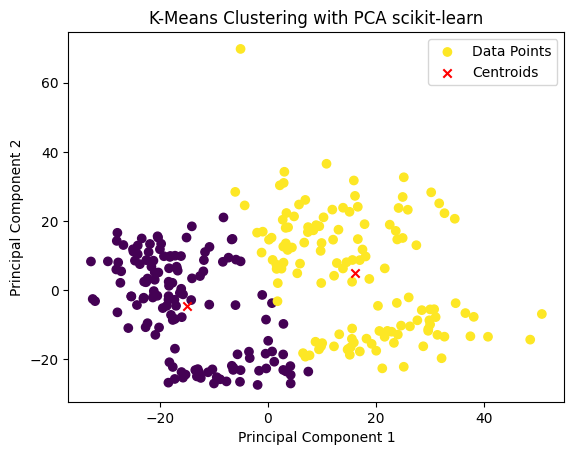

Centroids k = 2: [[75.51798561 21.72302158  8.64244604  3.35107914  7.41942446 45.26978417
   0.27194245  0.87338129 19.11366906  1.66690647  2.31870504 71.57482014
   1.23021583  2.39352518  3.62302158  2.14100719  0.78992806  0.44100719
   1.51510791  0.76258993]
 [45.4496124  12.16046512  4.06356589  1.56589147  3.6372093  43.00852713
   0.15736434  0.52170543 17.79224806  0.77286822  1.1379845  67.52713178
   0.70232558  1.3379845   2.03643411  1.00852713  0.42790698  0.26744186
   0.81395349  0.48062016]]
Cluster 0: [[82.  37.2 19.2 ...  0.6  1.9  1. ]
 [76.  30.3 10.6 ...  0.2  2.   1. ]
 [78.  22.  10.1 ...  0.3  1.2  0. ]
 ...
 [82.  27.9  9.8 ...  0.9  1.7  1. ]
 [82.  18.9  6.6 ...  0.2  1.2  1. ]
 [80.  15.8  4.3 ...  0.2  0.8  0. ]]
Cluster 1: [[40.   6.7  3.6 ...  0.1  0.6  1. ]
 [27.   6.6  1.3 ...  0.6  0.3  1. ]
 [44.   6.4  2.4 ...  0.4  0.6  1. ]
 ...
 [53.   7.2  3.  ...  0.1  0.6  0. ]
 [56.  19.1  5.6 ...  1.8  1.9  1. ]
 [50.  16.3  5.4 ...  0.1  0.9  1. ]]


In [232]:
centroids, clusters = k_means(teste.values, 2)

print("Centroids k = 2:", centroids)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")

k = 3

/home/isabella/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


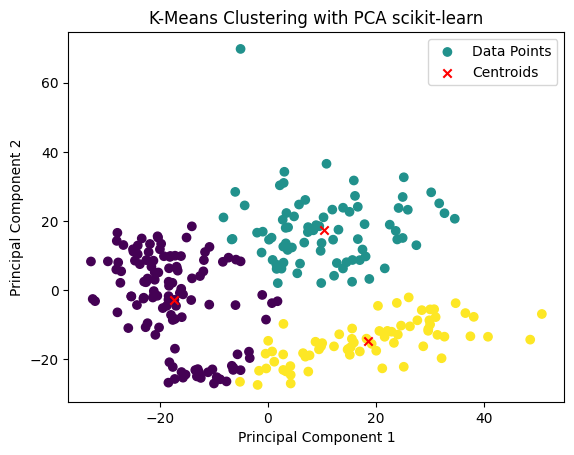

Centroids k = 3: [[7.65867769e+01 2.26074380e+01 9.11074380e+00 3.52561983e+00
  7.83966942e+00 4.50123967e+01 3.00826446e-01 9.66115702e-01
  2.10504132e+01 1.75619835e+00 2.40082645e+00 7.31190083e+01
  1.21735537e+00 2.44710744e+00 3.66528926e+00 2.34297521e+00
  8.33884298e-01 4.28099174e-01 1.59256198e+00 7.60330579e-01]
 [4.60512821e+01 1.30679487e+01 4.40256410e+00 1.66282051e+00
  4.09871795e+00 4.03461538e+01 2.78205128e-01 8.92307692e-01
  3.03897436e+01 7.85897436e-01 1.08846154e+00 7.25307692e+01
  5.24358974e-01 1.18589744e+00 1.70641026e+00 1.36025641e+00
  4.91025641e-01 1.76923077e-01 8.79487179e-01 3.84615385e-01]
 [5.07391304e+01 1.20782609e+01 4.05362319e+00 1.61594203e+00
  3.36521739e+00 4.70594203e+01 5.55111512e-17 3.18840580e-02
  5.00000000e-01 8.34782609e-01 1.35797101e+00 6.02188406e+01
  1.06376812e+00 1.69130435e+00 2.74927536e+00 5.52173913e-01
  3.73913043e-01 4.37681159e-01 7.86956522e-01 6.66666667e-01]]
Cluster 0: [[82.  37.2 19.2 ...  0.6  1.9  1. ]
 

In [235]:
centroids_new, clusters_new = k_means(teste.values, 3)

print("Centroids k = 3:", centroids_new)
for i, cluster in enumerate(clusters_new):
    print(f"Cluster {i}: {cluster}")